In [1]:
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
!pip install common.utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
import os
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import math

from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler
#from common.utils import load_data, mape
from IPython.display import Image

%matplotlib inline
pd.options.display.float_format = '{:,.2f}'.format
np.set_printoptions(precision=2)
warnings.filterwarnings("ignore") # specify to ignore warning messages

In [16]:
energy = pd.read_csv('/content/sdu-data-day-5.csv')
energy.head(10)

Date  LWP   WS   WD   RF        LUX  AirTC  AirHP  AirPP
0  5/1/2023, 11:15:12 PM    5 3.84  wsw 0.00       0.00  22.39  90.13 922.91
1  5/1/2023, 10:12:44 PM   25 1.92  sse 0.00       0.00  22.49  86.17 922.38
2   5/1/2023, 9:10:17 PM    0 1.44  ene 0.00       0.00  25.64  71.10 921.95
3   5/1/2023, 8:07:54 PM    0 0.96  nne 0.00       0.00  26.91  67.37 920.48
4   5/1/2023, 7:05:29 PM    0 0.00  ene 0.00       0.00  27.01  62.09 919.53
5   5/1/2023, 6:03:07 PM    0 2.40  nne 0.00   4,091.00  29.02  54.11 918.47
6   5/1/2023, 5:00:46 PM    0 0.00  nne 0.00   8,441.00  29.16  56.44 918.00
7   5/1/2023, 3:58:26 PM    0 3.84  nne 0.00   9,886.00  31.19  50.59 918.05
8   5/1/2023, 2:56:13 PM    0 2.88  nne 0.00 133,586.00  34.76  45.95 918.56
9   5/1/2023, 1:54:01 PM    0 3.36  nne 0.00  78,898.00  33.27  49.64 919.75

In [30]:
energy.tail(10)

Date  LWP   WS   WD   RF    LUX  AirTC  AirHP  AirPP
2089  1/14/2023, 4:07:59 PM    0 0.00  nne 0.00  52.00  26.26  36.51 911.11
2090  1/14/2023, 2:01:25 PM    0 0.00  nne 0.00  47.00  25.33  37.63 911.84
2091  1/14/2023, 9:47:39 AM    0 0.00  nne 0.00  41.00  24.09  43.90 915.69
2092  1/14/2023, 5:34:27 AM    0 0.00  nne 0.00   0.00  24.64  43.10 913.30
2093  1/14/2023, 1:21:15 AM    0 0.00  nne 0.00   0.00  25.55  41.28 913.74
2094  1/13/2023, 9:08:18 PM    0 0.00  nne 0.00   0.00  26.37  37.65 914.36
2095  1/13/2023, 8:05:52 PM    0 0.00  nne 2.79  11.00  26.50  35.82 913.80
2096  1/13/2023, 7:03:34 PM    1 0.00  nne 0.00 272.00  27.48  30.87 912.87
2097  1/13/2023, 5:52:03 PM    0 0.00  nne 1.96 -99.00 -99.00 -99.00 -99.00
2098  1/13/2023, 5:31:28 PM    0 0.00   nw 0.00 -99.00 -99.00 -99.00 -99.00

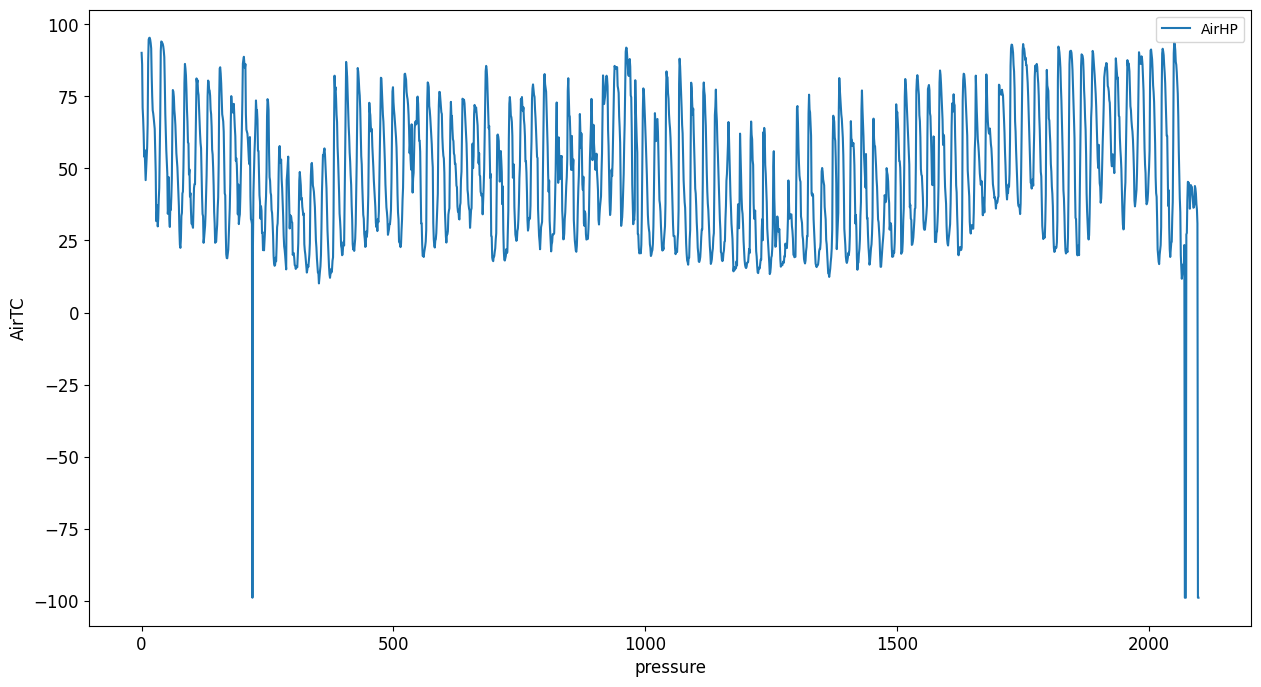

In [24]:
energy.plot(y='AirHP', subplots=True, figsize=(15, 8), fontsize=12)
plt.xlabel("pressure", fontsize=12)
plt.ylabel('AirTC', fontsize=12)
plt.show()

In [36]:
train_start_dt = '5/1/2023, 11:15:12'
 

In [32]:
test_start_dt = '5/4/2023, 11:15:12'

In [37]:
energy[(energy.index < int(test_start_dt)) & (energy.index >= train_start_dt)][['load']].rename(columns={'load':'train'}) \
    .join(energy[test_start_dt:][['load']].rename(columns={'load':'test'}), how='outer') \
    .plot(y=['train', 'test'], figsize=(15, 8), fontsize=12)
plt.xlabel('timestamp', fontsize=12)
plt.ylabel('load', fontsize=12)
plt.show()


ValueError: ignored